In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
all_networks_edgelists = pd.read_csv("All_networks_edgelists_named.csv")

In [3]:
all_networks_edgelists.head(5)

,Unnamed: 0,source,network_type,network_path,Plant,matched_name,genus,family,Pollinator,Value
0,0,iwdb,binary,/Users/noa/Workspace/networks/iwdb/binary/sant...,ziziphus cotinifolia reiss.,ziziphus cotinifolia,ziziphus,rhamnaceae,Polybia ignobilis,1.0
1,1,iwdb,binary,/Users/noa/Workspace/networks/iwdb/binary/sant...,caesalpinia pyramidalis tul.,cenostigma pyramidale (tul.) gagnon & g.p.lewis,cenostigma,fabaceae,Polybia ignobilis,1.0
2,2,iwdb,binary,/Users/noa/Workspace/networks/iwdb/binary/sant...,erythroxylon catingae plowman,erythroxylum caatingae,erythroxylum,erythroxylaceae,Polybia ignobilis,1.0
3,3,iwdb,binary,/Users/noa/Workspace/networks/iwdb/binary/sant...,senna spectabilis (dc.) i. & b.,senna spectabilis,senna,fabaceae,Polybia ignobilis,1.0
4,4,iwdb,binary,/Users/noa/Workspace/networks/iwdb/binary/sant...,sidastrum paniculatum (l.) fryxell,sidastrum paniculatum,sidastrum,malvaceae,Polybia ignobilis,1.0


In [7]:
sources = all_networks_edgelists.groupby("source")["network_path"].nunique().sort_values(ascending = False)
print(sources)
print("\n########\n")
network_types = all_networks_edgelists.groupby("network_type")["network_path"].nunique().sort_values(ascending = False)
print(network_types)
print("\n########\n")
unique_plants_count = all_networks_edgelists.groupby(["Plant","matched_name"])["network_path"].nunique().sort_values(ascending = False)
print(f"Number of distinct plants: {len(unique_plants_count.index)} ,Percentage of known plants: {np.mean(unique_plants_count.reset_index()['matched_name']!='unknown')}\n")
print(unique_plants_count.head(10))
print("\n########\n")
genus = all_networks_edgelists.groupby("genus")["network_path"].nunique().sort_values(ascending = False)
print(genus.head(10))
print("\n########\n")
unique_pollinators_count = all_networks_edgelists.groupby(["Pollinator"])["network_path"].nunique().sort_values(ascending = False)
print(f"Number of pollinators: {len(unique_pollinators_count.index)}\n")
print(unique_pollinators_count.head(10))

    


source
mangal         324
web_of_life    153
literature      55
iwdb            10
Name: network_path, dtype: int64

########

network_type
weighted    362
binary      180
Name: network_path, dtype: int64

########

Number of distinct plants: 4511 ,Percentage of known plants: 0.6931944136555087

Plant                       matched_name              
lasioglossum incompletum    lasioglossum incompletum      130
halictus tripartitus        halictus tripartitus          128
toxomerus marginatus        toxomerus marginatus          107
halictus ligatus            halictus ligatus              102
eupeodes fumipennis         eupeodes fumipennis            89
paragus haemorrhous         paragus haemorrhous            82
syritta pipiens             syritta pipiens                66
nephrosperma vanhoutteanum  nephrosperma vanhoutteanum     65
platycheirus stegnus        platycheilus                   62
eupeodes volucris           eupeodes volucris              61
Name: network_path, dtype: i

In [5]:
all_networks_edgelists["is_plant_unknown"] = all_networks_edgelists["matched_name"] == "unknown"
plants_per_network = all_networks_edgelists[["network_path","matched_name","is_plant_unknown"]].drop_duplicates()
pct_unknown_plants_per_network = plants_per_network.groupby("network_path").mean("is_plant_unknown")
per_network_statistics = all_networks_edgelists.groupby("network_path").agg(pollinators = ("Pollinator","nunique"),
                                                                           plants = ("Plant","nunique"),
                                                                            interactions = ("Value","count"),
                                                                            total_visits = ("Value","sum")
                                                                           )

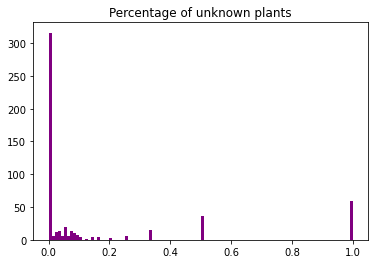

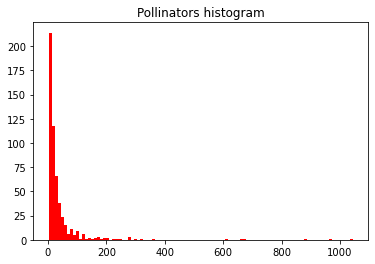

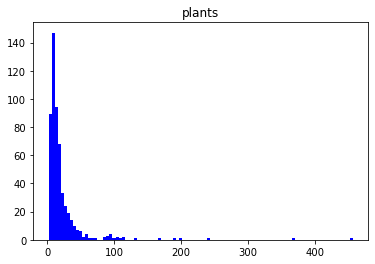

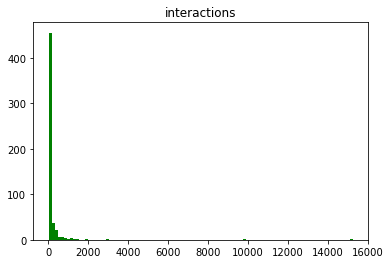

In [6]:
plt.hist(pct_unknown_plants_per_network["is_plant_unknown"],color = "purple", bins = 100 )
plt.title('Percentage of unknown plants')
plt.show()

plt.hist(per_network_statistics["pollinators"], color = "red", bins = 100)
plt.title('Pollinators histogram')
plt.show()

plt.hist(per_network_statistics["plants"], color = "blue", bins = 100)
plt.title('plants')
plt.show()

plt.hist(per_network_statistics["interactions"], color = "green", bins = 100)
plt.title('interactions')
plt.show()